## **Data Science & Business Analytics**

## **Task 1: Predicion using Supervised ML**

### **Algorithm : Linear Regression**

### **We are going to predict the percentage of marks that a student is expected to obtain by the number of hours they studied.**

**To increase the performance of my model , i had used Standardization as explained below.**

### Author: Goutham Pasumarthy


In [195]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Observe that the range of values for the variables are different. Hours range from 0-24. and Scores from 0-100.
#### In this case, there will be a bias as the variable with larger range will outweigh the other variable.
#### Transforming the data to comparable scales can prevent this problem
#### Although this task is simple and contains less data , it doesn't actually need this step. 
#### I'm gonna be using it anyways to try something new.


**Now we are going to Standardize the data using StandardScaler**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(s_data)
data_s = pd.DataFrame(data_scaled, columns = ["Hours","Scores"])
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))
print(data_s)

[1.59872116e-16 1.33226763e-16]
[1. 1.]
       Hours    Scores
0  -1.015328 -1.230223
1   0.035569 -0.180820
2  -0.732394 -0.988053
3   1.409819  0.949306
4  -0.611137 -0.866968
5  -1.419519 -1.270585
6   1.692753  1.474008
7   0.197245  0.343881
8   1.328981  1.191476
9  -0.934490 -1.068777
10  1.086466  1.352923
11  0.358922  0.424605
12 -0.206946 -0.422990
13 -0.691975 -0.382629
14 -1.581196 -1.391670
15  1.571495  1.756539
16 -1.015328 -0.866968
17 -1.257843 -1.109138
18  0.439760  0.626413
19  0.965209  0.707136
20 -0.934490 -0.866968
21 -0.085689  0.101711
22 -0.489880 -0.665160
23  0.763113  0.989668
24  1.126885  1.393284


**Plotting original data vs Plotting scaled data**

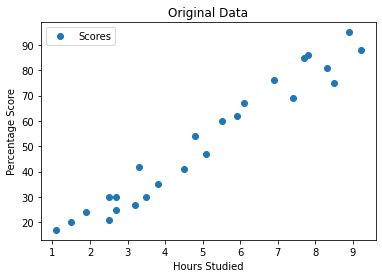

In [196]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Original Data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

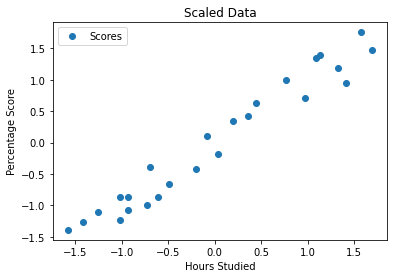

In [200]:
data_s.plot(x='Hours', y='Scores', style='o')  
plt.title('Scaled Data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**
### In this part we are going to split the data into training and test sets
The first step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [0]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [14]:
X = data_s.iloc[:, :-1].values  
y = data_s.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


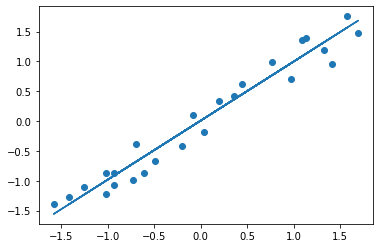

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## **Making Predictions**


In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[-1.4195194 ]
 [-0.7323944 ]
 [ 0.96520852]
 [-1.01532822]
 [ 0.35892176]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,-1.270585,-1.396346
1,-0.988053,-0.716328
2,0.707136,0.963716
3,-0.866968,-0.996336
4,0.424605,0.363700


Taking input hours 9.25

In [212]:
hours = [[9.25]]
#own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0]))
hours[0].append(0.16)
print(hours)
x = pd.DataFrame(hours,[[0]],columns = ["Hours","Scores"])
print("\nA temporary Data Frame For Standardizing Input with Score Yet to Be Calculated:")
print(x)
temp = scaler.transform(x)[0]
print("\n Standardized Value for the input hours : \n" , temp)


No of Hours = [9.25]
[[9.25, 0.16]]

A temporary Data Frame For Standardizing Input with Score Yet to Be Calculated:
   Hours  Scores
0   9.25    0.16

 Standardized Value for the input hours : 
 [ 1.71296219 -2.07136035]


Prediction of standardized score

In [191]:
temp[1] = regressor.predict([[temp[0]]])
own_pred = scaler.inverse_transform(temp)
print("\n Hours\t\tScore \n")
print(own_pred)
print("\nPredicted Score = {}".format(own_pred[1]))


 Hours		Score 

[ 9.25       93.69173249]

Predicted Score = 93.69173248737539


### **So, the predicted score for reading 9.25 hours in a day is 93.69**

## **Evaluating the model**

### **For evaluating the model, I used Mean Absolute Error.**

In [160]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 0.16886752752443157


### **Comparsion**
#### **If I did not use Standardization, the Mean Absolute Error would be around 4.25**
#### **Now the Standardized Mean Absolute Error reduced to 0.16 after StandardScaling. It will scale well when compared to original MAE less than 4**
